**Team Id**:PNT2022TMID29441

In [ ]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


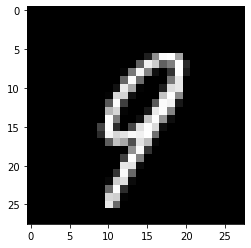

9


In [ ]:
plt.imshow(X_train[22], cmap="gray")
plt.show()
print (y_train[22])

In [ ]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [ ]:
# Reshaping so as to convert images for our model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


In [ ]:
#one hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()

## Declare the layers
layer_1 = Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = MaxPooling2D(pool_size=2)
layer_3 = Conv2D(32, kernel_size=3, activation='relu')
layer_4 = MaxPooling2D(pool_size=2)
layer_5 = Dropout(0.5)
layer_6 = Flatten()
layer_7 = Dense(128, activation="relu")
layer_8 = Dropout(0.5)
layer_9 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(layer_5)
model.add(layer_6)
model.add(layer_7)
model.add(layer_8)
model.add(layer_9)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 73s 39ms/step - loss: 0.8458 - accuracy: 0.7874 - val_loss: 0.1274 - val_accuracy: 0.9637
Epoch 2/3
1875/1875 [==============================] - 72s 38ms/step - loss: 0.2857 - accuracy: 0.9165 - val_loss: 0.0837 - val_accuracy: 0.9735
Epoch 3/3
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2186 - accuracy: 0.9361 - val_loss: 0.0702 - val_accuracy: 0.9776


1/1 [==============================] - 0s 106ms/step
Prediction (Softmax) from the neural network:

 [[9.9988294e-01 9.8936616e-11 6.2085765e-06 1.5238950e-08 6.3068786e-09
  2.0078383e-08 4.9691851e-05 2.0312145e-09 5.5215929e-05 5.9484446e-06]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




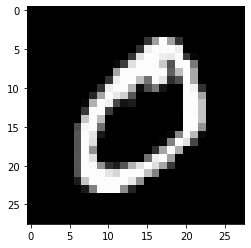



Final Output: 0


In [ ]:
example = X_train[1]
prediction = model.predict(example.reshape(1, 28, 28, 1))
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))

print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))

In [ ]:
metrices=model.evaluate(X_test,y_test,verbose=0)
print("Metrices(test loss and Test Accuracy):")
print(metrices)

Metrices(test loss and Test Accuracy):
[0.07024074345827103, 0.9775999784469604]


In [ ]:
prediction=model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 20ms/step
[[3.75857401e-10 2.40004820e-13 8.61340439e-08 3.46360309e-07
  3.75392561e-13 1.31159569e-13 9.03199421e-18 9.99999523e-01
  1.56926527e-10 2.65024109e-08]
 [9.03573266e-07 1.06726425e-07 9.99998689e-01 3.33681740e-08
  2.06945505e-09 1.57212329e-12 2.81613772e-08 1.84990370e-08
  2.09412860e-07 5.98570195e-12]
 [1.98595226e-05 9.99709308e-01 7.42434204e-05 6.06297021e-07
  5.28519704e-05 3.29027415e-07 1.71541706e-05 7.86960118e-06
  1.07850297e-04 9.88888405e-06]
 [9.97850060e-01 6.43260445e-10 8.40753637e-06 7.85840371e-08
  1.15752442e-07 5.05949117e-07 1.57781271e-03 9.98304817e-09
  4.32252855e-04 1.30715722e-04]]


In [ ]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:5])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
